___


___
# EXPLAINABLE AI (XAI) AND FAIRNESS



# Import Libraries


In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
from graphviz import Digraph
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
import lime
#from anchor import anchor_tabular
import xgboost 
#import shap
import alibi
from imblearn.over_sampling import SMOTE
import random
import dalex as dx

## Get the Data


In [2]:
columns_name = ["Status_of_existing_checking_account","Duration_in_month","Credit_history","Purpose", "Credit_amount", "Savings_account",
          "employment_since","Installment_rate_of_disposable_income","Sex","Other_debtors","Present_residence_since",
           "Property","Age","Other_installment_plans","Housing","Number_of_credits","Job","Number_of_people_being_liable_to_provide_maintenance",
          "Telephone","foreign_worker"]

In [3]:
german_data = pd.read_csv('german.data',sep=" ", header = None, names = columns_name,index_col=False)

In [4]:
german_data

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,employment_since,Installment_rate_of_disposable_income,Sex,Other_debtors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_of_credits,Job,Number_of_people_being_liable_to_provide_maintenance,Telephone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


## Preprcess


In [5]:
dict_values = {
        "A11" : "min_0_DM",
        "A12" : "in_0_200_DM",
        "A13" : "mag_200_DM",
        "A14" : "no_checking_account",
        "A30" : "all_credits_paid_back",
        "A31" : "all_credits_at_this_bank_paid_back",
        "A32" : "existing_credits_paid_back_till_now",
        "A33" : "delay_in_paying_off_in_the_past",
        "A34" : "critical_account",
        "A40" : "car_new",
        "A41" : "car_used",
        "A42" : "furniture",
        "A43" : "radio_television",
        "A44" : "domestic_appliances",
        "A45" : "repairs",
        "A46" : "education",
        "A47" : "vacation",
        "A48" : "retraining",
        "A49" : "business",
        "A410" : "others",
        "A61" : "less_100_DM",
        "A62" : "in_100_500_DM",
        "A63" : "in_500_1000_DM",
        "A64" : "more_1000_DM",
        "A65" : "no_savings",
        "A71" : "more_7_years",
        "A72" : "in_4_7_years",
        "A73" : "in_1_4_years",
        "A74" : "less_1_year",
        "A75" : "unemployed",
        "A91" : "F",
        "A92" : "M",
        "A93" : "F",
        "A94" : "F",
        "A95" : "M",
        "A101" : "none",
        "A102" : "co_applicant",
        "A103" : "guarantor",
        "A121" : "real_estate",
        "A122" : "society",
        "A123" : "car",
        "A124" : "no_property",
        "A141" : "bank",
        "A142" : "stores",
        "A143" : "none",
        "A151" : "rent",
        "A152" : "own",
        "A153" : "for_free",
        "A171" : "self-employed",
        "A172" : "skilled_employee",
        "A173" : "unskilled",
        "A174" : "manager",
        "A191" : "none",
        "A192" : "yes",
        "A201" : "no",
        "A202" : "yes"
}


In [6]:
german_data = german_data.replace({"Status_of_existing_checking_account": dict_values,
                                  "Credit_history": dict_values,
                                  "Purpose": dict_values,
                                  "Savings_account": dict_values,
                                  "employment_since": dict_values,
                                  "Sex": dict_values,
                                  "Other_debtors": dict_values,
                                  "Property": dict_values,
                                  "Other_installment_plans": dict_values,
                                  "Housing": dict_values,
                                  "Job": dict_values,
                                  "Telephone": dict_values,
                                  "foreign_worker": dict_values})
german_data

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,employment_since,Installment_rate_of_disposable_income,Sex,Other_debtors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_of_credits,Job,Number_of_people_being_liable_to_provide_maintenance,Telephone,foreign_worker
0,min_0_DM,6,critical_account,radio_television,1169,no_savings,unemployed,4,F,none,4,real_estate,67,none,own,2,unskilled,1,yes,no
1,in_0_200_DM,48,existing_credits_paid_back_till_now,radio_television,5951,less_100_DM,in_1_4_years,2,M,none,2,real_estate,22,none,own,1,unskilled,1,none,no
2,no_checking_account,12,critical_account,education,2096,less_100_DM,less_1_year,2,F,none,3,real_estate,49,none,own,1,skilled_employee,2,none,no
3,min_0_DM,42,existing_credits_paid_back_till_now,furniture,7882,less_100_DM,less_1_year,2,F,guarantor,4,society,45,none,for_free,1,unskilled,2,none,no
4,min_0_DM,24,delay_in_paying_off_in_the_past,car_new,4870,less_100_DM,in_1_4_years,3,F,none,4,no_property,53,none,for_free,2,unskilled,2,none,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_checking_account,12,existing_credits_paid_back_till_now,furniture,1736,less_100_DM,less_1_year,3,M,none,4,real_estate,31,none,own,1,skilled_employee,1,none,no
996,min_0_DM,30,existing_credits_paid_back_till_now,car_used,3857,less_100_DM,in_1_4_years,4,F,none,4,society,40,none,own,1,manager,1,yes,no
997,no_checking_account,12,existing_credits_paid_back_till_now,radio_television,804,less_100_DM,unemployed,4,F,none,4,car,38,none,own,1,unskilled,1,none,no
998,min_0_DM,45,existing_credits_paid_back_till_now,radio_television,1845,less_100_DM,in_1_4_years,4,F,none,4,no_property,23,none,for_free,1,unskilled,1,yes,no


In [7]:
german_data['Target'] = np.where(german_data['Credit_history'] == "critical_account", 1, 0)
german_data=german_data.drop(columns=['Credit_history','Telephone'])

In [8]:
german_data['Target'].value_counts()

0    707
1    293
Name: Target, dtype: int64

## Train the model

create a pipeline model
- numerical_transformer pipeline:

- numerical_features: choose numerical features to transform
- impute missing data with median strategy
- scale numerical features with standard scaler
- categorical_transformer pipeline:

- categorical_features: choose categorical features to transform
- impute missing data with 'missing' string
- encode categorical features with one-hot
- aggregate those two pipelines into a preprocessor using ColumnTransformer

make a basic classifier model using MLPClassifier - it has 4 hidden layers with sizes 150, 100, 50 respectively
construct a clf pipeline model, which combines the preprocessor with the basic classifier model

In [249]:
X = german_data.drop('Target',axis=1)
y = german_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [250]:
numerical_features = ['Duration_in_month', 'Credit_amount', 'Installment_rate_of_disposable_income', 'Present_residence_since',
                     'Age','Number_of_credits','Number_of_people_being_liable_to_provide_maintenance']
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_features = ['Status_of_existing_checking_account', 'Purpose','Savings_account','employment_since',
                       'Sex','Other_debtors','Property','Other_installment_plans','Housing','Job',
                       'foreign_worker']
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500, random_state=1234)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])

In [251]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [252]:
prediction_clf = clf.predict_proba(X_test)[:,1]

In [254]:
print("ROC:",roc_auc_score(y_test, prediction_clf))

ROC: 0.8010612476761


Text(0.5, 0, 'Prediction')

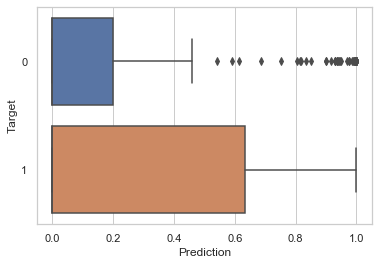

In [179]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=prediction_clf,y=y_test.astype('category'))
ax.set_xlabel('Prediction')

## EXPLAIN THE RESULTS

In [15]:
exp = dx.Explainer(clf, X, y, label = "Credit Risk MLP Pipeline")

Preparation of a new explainer is initiated

  -> data              : 1000 rows 18 cols
  -> target variable   : Argument 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1000 values
  -> model_class       : sklearn.pipeline.Pipeline (default)
  -> label             : Credit Risk MLP Pipeline
  -> predict function  : <function yhat_proba_default at 0x0000026315BFB168> will be used (default)
  -> predicted values  : min = 1.2539942732965242e-15, mean = 0.23491131054737718, max = 0.9999999829123459
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.9999633296270777, mean = 0.058088689452622806, max = 0.9999999999989152
  -> model_info        : package sklearn

A new explainer has been created!


In [157]:
idx3 = np.where((prediction_clf>0.90) & (y_test==1))[0][0] #True Positive
idx4 = np.where((prediction_clf>0.90) & (y_test==0))[0][0] #False Positive

In [158]:
TPcase = X_test.iloc[[idx3]]
FPcase = X_test.iloc[[idx4]]

### Explain instances
'break_down'

'break_down_interactions'

'shap'

This function calculates Variable Attributions as Break Down (https://pbiecek.github.io/ema/breakDown.html) or Shapley Values explanations (https://pbiecek.github.io/ema/shapley.html).

Model prediction is decomposed into parts that are attributed for particular variables.

In [171]:
print("true value:", y_test.iloc[idx3])
print("prediction:", prediction_clf[idx3])

#Shap
sh_TPcase = exp.predict_parts(TPcase, type='shap', B = 20)
sh_TPcase.result.label = "True Positive Case"
sh_TPcase.plot(max_vars=10)

print("intance of test set:")
TPcase

true value: 1
prediction: 0.9993537493706607


intance of test set:


,Status_of_existing_checking_account,Duration_in_month,Purpose,Credit_amount,Savings_account,employment_since,Installment_rate_of_disposable_income,Sex,Other_debtors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_of_credits,Job,Number_of_people_being_liable_to_provide_maintenance,foreign_worker
262,min_0_DM,18,car_new,5302,less_100_DM,unemployed,2,F,none,4,no_property,36,none,for_free,3,manager,1,no


In [168]:
print("true value:", y_test.iloc[idx4])
print("prediction:", prediction_clf[idx4])

#Shap
sh_FPcase = exp.predict_parts(FPcase, type='shap', B = 10)
sh_FPcase.result.label = "False Positive Case"
sh_FPcase.plot(max_vars=10)

true value: 0
prediction: 0.9993198836489939


## Quantifyng Unfairness

In [180]:
X_test_v = X_test.copy()
X_test_v["Pred_target"] = ((clf.predict_proba(X_test)[:,1]) > (german_data.Target.mean())).astype(int)

STARTING DATASET
Average H-risk: 0.293
Average H-risk for woman: 0.3101449275362319
Average H-risk for man: 0.25483870967741934
__________________________________________________________________________
                                                                          
MODEL PREDICTION
Average H-risk -model output: 0.24166666666666667
Average H-risk for woman - model output: 0.2529832935560859
Average H-risk for man - model output: 0.2154696132596685


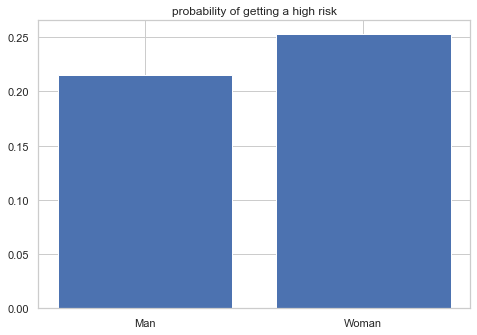

In [245]:
print("STARTING DATASET")
print("Average H-risk:",german_data.Target.mean())
print("Average H-risk for woman:",german_data.loc[german_data['Sex'] == "F", "Target"].mean())
print("Average H-risk for man:",german_data.loc[german_data['Sex'] == "M", "Target"].mean())

print("__________________________________________________________________________")
print("                                                                          ")
print("MODEL PREDICTION")
print("Average H-risk -model output:",X_test_v.Pred_target.mean())
print("Average H-risk for woman - model output:",X_test_v.loc[X_test_v['Sex'] == "F", "Pred_target"].mean())
print("Average H-risk for man - model output:",X_test_v.loc[X_test_v['Sex'] == "M", "Pred_target"].mean())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Man', 'Woman']
values = [X_test_v.loc[X_test_v['Sex'] == "M", "Pred_target"].mean(),X_test_v.loc[X_test_v['Sex'] == "F", "Pred_target"].mean()]
ax.bar(classes,values)
plt.title("probability of getting a high risk")
plt.show()

In [25]:
DIT = X_test_v.loc[german_data['Sex'] == "M", "Pred_target"].mean()/X_test_v.loc[german_data['Sex'] == "F", "Pred_target"].mean()
print("Disparate impact testing:",DIT)

Disparate impact testing: 0.8517147920358595


## Removing Unfairness

### Preprocessing method: Oversampling

In [238]:
X_train_o = X_train.copy()
X_train_o["Target"]=y_train

In [239]:
#Oversampling

#quantity of every combination "protected attribute - target variable"
A = sum((X_train_o.Sex=="F") & (X_train_o.Target==1))
B = sum((X_train_o.Sex=="F") & (X_train_o.Target==0))
C = sum((X_train_o.Sex=="M") & (X_train_o.Target==1))
D = sum((X_train_o.Sex=="M") & (X_train_o.Target==0))

#Optimal quantity of C for non-discrimination
C_ott = (A*D/(A+B))/(1-(A/(A+B)))

print("Quantity of C:",C)
print("Optimal Quantity of C:",C_ott)
print("Ratio for woman :",A/ (A+B))
print("Ratio for man :",C/(C+D))
print("Optimal ratio for man :",C_ott/(C_ott+D))

Quantity of C: 26
Optimal Quantity of C: 42.380208333333336
Ratio for woman : 0.2915129151291513
Ratio for man : 0.20155038759689922
Optimal ratio for man : 0.2915129151291513


In [240]:
underClass = X_train_o[(X_train_o.Sex=="M") & (X_train_o.Target==1)].copy()

In [241]:
underClass = underClass.reset_index().drop(columns= "index")

In [242]:
RtA = int(C_ott) - C
for x in range(0,RtA):
    X_train_o = X_train_o.append(underClass.iloc[random.sample(list(underClass.index),1)])

In [243]:
#Quote per ogni partizione variabile sensibile - target
A = sum((X_train_o.Sex=="F") & (X_train_o.Target==1))
B = sum((X_train_o.Sex=="F") & (X_train_o.Target==0))
C_new = sum((X_train_o.Sex=="M") & (X_train_o.Target==1))
D = sum((X_train_o.Sex=="M") & (X_train_o.Target==0))

#quota di C ottimale per non discriminazione

print("New Quantity of C:",C_new)

print("Ratio for woman :",A/ (A+B))
print("Ratio for man :",C_new/(C_new+D))

New Quantity of C: 42
Ratio for woman : 0.2915129151291513
Ratio for man : 0.2896551724137931


In [232]:
y_train_o = X_train_o["Target"]
X_train_o = X_train_o.drop(columns=("Target"))

In [233]:
clf.fit(X_train_o,y_train_o)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

MODEL PREDICTION
Average H-risk - model output: 0.25833333333333336
Average H-risk for woman - model output: 0.2577565632458234
Average H-risk for man - model output: 0.2596685082872928


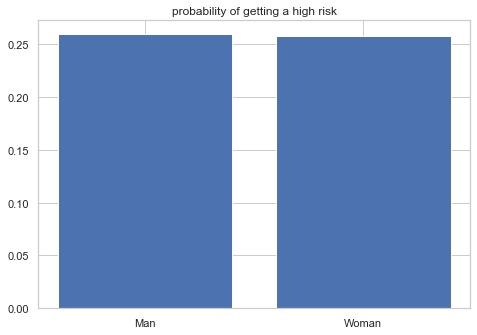

In [246]:
X_test_v_O = X_test.copy()
X_test_v_O["Pred_target"] = ((clf.predict_proba(X_test)[:,1]) > (german_data.Target.mean())).astype(int)

print("MODEL PREDICTION")
print("Average H-risk - model output:",X_test_v_O.Pred_target.mean())
print("Average H-risk for woman - model output:",X_test_v_O.loc[X_test_v_O['Sex'] == "F", "Pred_target"].mean())
print("Average H-risk for man - model output:",X_test_v_O.loc[X_test_v_O['Sex'] == "M", "Pred_target"].mean())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Man', 'Woman']
values = [X_test_v_O.loc[X_test_v_O['Sex'] == "M", "Pred_target"].mean(),X_test_v_O.loc[X_test_v_O['Sex'] == "F", "Pred_target"].mean()]
ax.bar(classes,values)
plt.title("probability of getting a high risk")
plt.show()

In [247]:
print("ROC:",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))


ROC: 0.8039790332575916


In [236]:
DIT = X_test_v_O.loc[german_data['Sex'] == "M", "Pred_target"].mean()/X_test_v_O.loc[german_data['Sex'] == "F", "Pred_target"].mean()
print("Disparate impact testing:",DIT)

Disparate impact testing: 1.0074176386331082
